In [1]:
#-Intregrasi colab dan drive-

from google.colab import drive
drive.mount('/content/drive')

#-Install lib yang dibutuhkan-
!pip install matplotlib --upgrade
!pip install swifter
!pip install Sastrawi
!pip install googletrans==3.1.0a0
from googletrans import Translator

import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

#-Modify-
import regex as re

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import swifter
import ast

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#-Model-
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

#-Asess-
import seaborn as sns
import pickle

#-Wordcloud-
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import PIL
from PIL import Image

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=d7780a1b0e72067a5bd580002183477555c4480e75a077db4e0d0b5a179cd594
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 947.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **MODIFY**

In [2]:
#define dataframe
data_prabowo = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoRMExcel.xlsx')
data_prabowo

,publishedAt,authorDisplayName,textDisplay,likeCount,sentimen,platform,capresName
0,2023-09-23T11:41:26Z,Putra Penyabar,......KARMA untuk REZIM......<br><br>2024 saat...,0,Netral,Youtube,PrabowoSubianto
1,2023-09-24T03:37:13Z,nurul hidayati,hadeuhhh...trak record ...liat lagiii....ini o...,0,Negatif,Youtube,PrabowoSubianto
2,2023-09-21T16:34:15Z,riski channel87,Dri dlu capres jga janji nya gini😂 memakmurkan...,3,Negatif,Youtube,PrabowoSubianto
3,2023-09-24T04:17:04Z,Safrianus Barung,Prabowo ini Pembohong. Nyatanya 2 caleg gerind...,0,Negatif,Youtube,PrabowoSubianto
4,2023-10-06T14:59:50Z,Nurazis Procircius,Semoga terwujud pak Prabowo menjadi pemimpin n...,22,Positif,Youtube,PrabowoSubianto
...,...,...,...,...,...,...,...
895,2023-09-22T01:12:32Z,Fahdi Bozz,Sumber daya Indonesia udh banyak di ambil oleh...,0,Negatif,Youtube,PrabowoSubianto
896,2023-10-03T10:41:52Z,Zainah Abdul Kadir,Kliatan bgt yg jawab sebagian besar manusia b...,0,Negatif,Youtube,PrabowoSubianto
897,2023-09-21T15:06:39Z,Dony Setiawan,Pertama pak hukum di Indonesia harus dibenahi ...,13,Netral,Youtube,PrabowoSubianto
898,2023-09-23T08:35:38Z,Bulan HendyDewy,2024 ERANYA PAK BOWO...<br>LANJUTKAN PROGRAM2 ...,0,Positif,Youtube,PrabowoSubianto


**Atribut elimination**

In [3]:
data_prabowo = data_prabowo[
    ['textDisplay','sentimen']
]
data_prabowo

,textDisplay,sentimen
0,......KARMA untuk REZIM......<br><br>2024 saat...,Netral
1,hadeuhhh...trak record ...liat lagiii....ini o...,Negatif
2,Dri dlu capres jga janji nya gini😂 memakmurkan...,Negatif
3,Prabowo ini Pembohong. Nyatanya 2 caleg gerind...,Negatif
4,Semoga terwujud pak Prabowo menjadi pemimpin n...,Positif
...,...,...
895,Sumber daya Indonesia udh banyak di ambil oleh...,Negatif
896,Kliatan bgt yg jawab sebagian besar manusia b...,Negatif
897,Pertama pak hukum di Indonesia harus dibenahi ...,Netral
898,2024 ERANYA PAK BOWO...<br>LANJUTKAN PROGRAM2 ...,Positif


**Text Preprocessing**

In [4]:
#CASE_FOLDING

#Definisikan fungsi case folding
def caseFolding(content):
    return content.lower()

In [5]:
#CLEANING

#regex pattern
clean_sym = re.compile(r'[^a-zA-Z\s]')
clean_num = re.compile(r'\d+')
clean_dblspc = re.compile(r'\s+')
clean_link = re.compile(r'<a\s+href="[^"]*"></a>')
clean_html = re.compile(r'<.*?>')

#definisikan fungsi cleaning
def cleaning(content):
    content = clean_sym.sub(' ', content)
    content = clean_num.sub(' ', content)
    content = clean_dblspc.sub(' ', content)
    content = clean_link.sub(' ', content)
    content = clean_html.sub(' ', content)
    return content

In [6]:
#TOKENIZING

#definisikan fungsi tokenize
def tokenize(content):
    return word_tokenize(content)

In [7]:
#NORMALIZE

#read kamus norm
norm_words = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/norm.xlsx')

In [8]:
#DICTIONARY

norm_word_dict = {}

#mengganti kata sesuai kamus norm
for index, row in norm_words.iterrows():
    if row[0] not in norm_word_dict:
        norm_word_dict[row[0]] = row[1]

#definisikan fungsi normalize
def normalize(content):
    return [
        norm_word_dict[word] if word in norm_word_dict else word for word in content
    ]

In [9]:
#STOPWORDS

nltk_stopwords = stopwords.words('indonesian')
txt_stopwords = open(
    '/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/stopwordPrabowoFinal.txt', 'r'
).read().split()

In [10]:
all_stopword = nltk_stopwords + txt_stopwords #stopword NLTK dan stopword sesuai paslon
all_stopword = set(all_stopword)

#definisikan fungsi stopword removal
def stopword_removal(content):
    return [word for word in content if word not in all_stopword]

In [11]:
data_prabowo.insert(2, 'loweredNew', data_prabowo.iloc[:,0].apply(caseFolding))
data_prabowo.insert(3, 'cleanedNew', data_prabowo.iloc[:,2].apply(cleaning))
data_prabowo.insert(4, 'tokenizedNew', data_prabowo.iloc[:,3].apply(tokenize))
data_prabowo.insert(5, 'normalized', data_prabowo.iloc[:,4].apply(normalize))
data_prabowo.insert(6, 'stopword_removed', data_prabowo.iloc[:,5].apply(stopword_removal))
data_prabowo

,textDisplay,sentimen,loweredNew,cleanedNew,tokenizedNew,normalized,stopword_removed
0,......KARMA untuk REZIM......<br><br>2024 saat...,Netral,......karma untuk rezim......<br><br>2024 saat...,karma untuk rezim br br saatnya capres boneka...,"[karma, untuk, rezim, br, br, saatnya, capres,...","[karma, untuk, rezim, br, br, saatnya, capres,...","[karma, rezim, capres, boneka, istana, bergugu..."
1,hadeuhhh...trak record ...liat lagiii....ini o...,Negatif,hadeuhhh...trak record ...liat lagiii....ini o...,hadeuhhh trak record liat lagiii ini org ordeb...,"[hadeuhhh, trak, record, liat, lagiii, ini, or...","[waduh, jalur, catatan, lihat, lagi, ini, oran...","[jalur, catatan, lihat, orang, ordebaru, cenda..."
2,Dri dlu capres jga janji nya gini😂 memakmurkan...,Negatif,dri dlu capres jga janji nya gini😂 memakmurkan...,dri dlu capres jga janji nya gini memakmurkan ...,"[dri, dlu, capres, jga, janji, nya, gini, mema...","[dari, dulu, capres, juga, janji, nya, gini, m...","[capres, janji, nya, gini, memakmurkan, rakyat..."
3,Prabowo ini Pembohong. Nyatanya 2 caleg gerind...,Negatif,prabowo ini pembohong. nyatanya 2 caleg gerind...,prabowo ini pembohong nyatanya caleg gerindra ...,"[prabowo, ini, pembohong, nyatanya, caleg, ger...","[prabowo, ini, pembohong, nyatanya, caleg, ger...","[prabowo, pembohong, caleg, gerindra, terdafta..."
4,Semoga terwujud pak Prabowo menjadi pemimpin n...,Positif,semoga terwujud pak prabowo menjadi pemimpin n...,semoga terwujud pak prabowo menjadi pemimpin n...,"[semoga, terwujud, pak, prabowo, menjadi, pemi...","[semoga, terwujud, bapak, prabowo, menjadi, pe...","[semoga, terwujud, prabowo, pemimpin, negara]"
...,...,...,...,...,...,...,...
895,Sumber daya Indonesia udh banyak di ambil oleh...,Negatif,sumber daya indonesia udh banyak di ambil oleh...,sumber daya indonesia udh banyak di ambil oleh...,"[sumber, daya, indonesia, udh, banyak, di, amb...","[sumber, daya, indonesia, sudah, banyak, di, a...","[sumber, daya, indonesia, ambil, negara, asing]"
896,Kliatan bgt yg jawab sebagian besar manusia b...,Negatif,kliatan bgt yg jawab sebagian besar manusia b...,kliatan bgt yg jawab sebagian besar manusia ba...,"[kliatan, bgt, yg, jawab, sebagian, besar, man...","[kelihatan, banget, yang, jawab, sebagian, bes...","[banget, manusia, bayaran]"
897,Pertama pak hukum di Indonesia harus dibenahi ...,Netral,pertama pak hukum di indonesia harus dibenahi ...,pertama pak hukum di indonesia harus dibenahi ...,"[pertama, pak, hukum, di, indonesia, harus, di...","[pertama, bapak, hukum, di, indonesia, harus, ...","[hukum, indonesia, dibenahi, hukum, indonesia,..."
898,2024 ERANYA PAK BOWO...<br>LANJUTKAN PROGRAM2 ...,Positif,2024 eranya pak bowo...<br>lanjutkan program2 ...,eranya pak bowo br lanjutkan program pakde jo...,"[eranya, pak, bowo, br, lanjutkan, program, pa...","[eranya, bapak, prabowo, br, lanjutkan, progra...","[eranya, prabowo, lanjutkan, program, ibukota,..."


In [12]:
#STEMMING

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
#STEMMING

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#definisikan fungsi stemming
def stemming(word):
    return stemmer.stem(word)

word_dict = {}

for content in data_prabowo['stopword_removed']:
    for word in content:
        word_dict[word] = ' '

print(len(word_dict))
print('============================')
for word in word_dict:
    word_dict[word] = stemming(word)
    print(word,':' ,word_dict[word])

2413
karma : karma
rezim : rezim
capres : capres
boneka : boneka
istana : istana
berguguran : gugur
jalur : jalur
catatan : catat
lihat : lihat
orang : orang
ordebaru : ordebaru
cendana : cendana
cari,pemimpin : cari pimpin
memikirkan : pikir
rakyat : rakyat
negara : negara
kepentingan : penting
sendr : sendr
kelompok : kelompok
budak : budak
janji : janji
nya : nya
gini : gin
memakmurkan : makmur
indonesia : indonesia
maju : maju
basi : basi
kali : kali
prabowo : prabowo
pembohong : bohong
caleg : caleg
gerindra : gerindra
terdaftar : daftar
bohong : bohong
emosional : emosional
semoga : moga
terwujud : wujud
pemimpin : pimpin
beda : beda
bicara : bicara
utara : utara
selatan : selatan
program : program
gak : gak
realistis : realistis
pilih : pilih
kaya : kaya
raya : raya
mendukung : dukung
penacalonan : penacalonan
pemilihan : pilih
presiden : presiden
wapres : wapres
dukung : dukung
inget : inget
bagus : bagus
true : true
semangat : semangat
dijanjikan : janji
deh : deh
memutar : pu

In [14]:
def stemming_content(content):
    return [word_dict[word] for word in content]
data_prabowo.insert(
    7,
    'stemmed',
    data_prabowo.iloc[:,6].swifter.apply(stemming_content)
)

Pandas Apply:   0%|          | 0/900 [00:00<?, ?it/s]

In [15]:
# EXPORT CLEANED
data_prabowo.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoBeforeCleaning.xlsx', index=False)

In [16]:
# FINAL RESULT AND DROP ANOTHER ATTRIBUTES
data_prabowo.iloc[:,0] = data_prabowo.iloc[:,7]
data_prabowo = data_prabowo[['textDisplay','sentimen',]]
data_prabowo

,textDisplay,sentimen
0,"[karma, rezim, capres, boneka, istana, gugur]",Netral
1,"[jalur, catat, lihat, orang, ordebaru, cendana...",Negatif
2,"[capres, janji, nya, gin, makmur, rakyat, indo...",Negatif
3,"[prabowo, bohong, caleg, gerindra, daftar, boh...",Negatif
4,"[moga, wujud, prabowo, pimpin, negara]",Positif
...,...,...
895,"[sumber, daya, indonesia, ambil, negara, asing]",Negatif
896,"[banget, manusia, bayar]",Negatif
897,"[hukum, indonesia, benah, hukum, indonesia, ga...",Netral
898,"[era, prabowo, lanjut, program, ibukota nusant...",Positif


In [17]:
# EXPORT CLEANED
data_prabowo.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoBeforeMV.xlsx', index=False)

In [18]:
# MISSING VALUE

data_cleanPrabowo = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoBeforeMV.xlsx')

#definisikan fungsi join text list
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

data_cleanPrabowo.insert(1,'textDisplay_join', data_cleanPrabowo['textDisplay'].apply(join_text_list))

In [19]:
# EXPORT FINAL DATA PREP

data_cleanPrabowo = data_cleanPrabowo[data_cleanPrabowo['textDisplay_join'] != '' ].reset_index(drop=True)
display(data_cleanPrabowo)

data_cleanPrabowo.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoTestPrep.xlsx', index=False)

,textDisplay,textDisplay_join,sentimen
0,"['karma', 'rezim', 'capres', 'boneka', 'istana...",karma rezim capres boneka istana gugur,Netral
1,"['jalur', 'catat', 'lihat', 'orang', 'ordebaru...",jalur catat lihat orang ordebaru cendana cari ...,Negatif
2,"['capres', 'janji', 'nya', 'gin', 'makmur', 'r...",capres janji nya gin makmur rakyat indonesia m...,Negatif
3,"['prabowo', 'bohong', 'caleg', 'gerindra', 'da...",prabowo bohong caleg gerindra daftar bohong em...,Negatif
4,"['moga', 'wujud', 'prabowo', 'pimpin', 'negara']",moga wujud prabowo pimpin negara,Positif
...,...,...,...
853,"['sumber', 'daya', 'indonesia', 'ambil', 'nega...",sumber daya indonesia ambil negara asing,Negatif
854,"['banget', 'manusia', 'bayar']",banget manusia bayar,Negatif
855,"['hukum', 'indonesia', 'benah', 'hukum', 'indo...",hukum indonesia benah hukum indonesia gak maju,Netral
856,"['era', 'prabowo', 'lanjut', 'program', 'ibuko...",era prabowo lanjut program ibukota nusantara p...,Positif


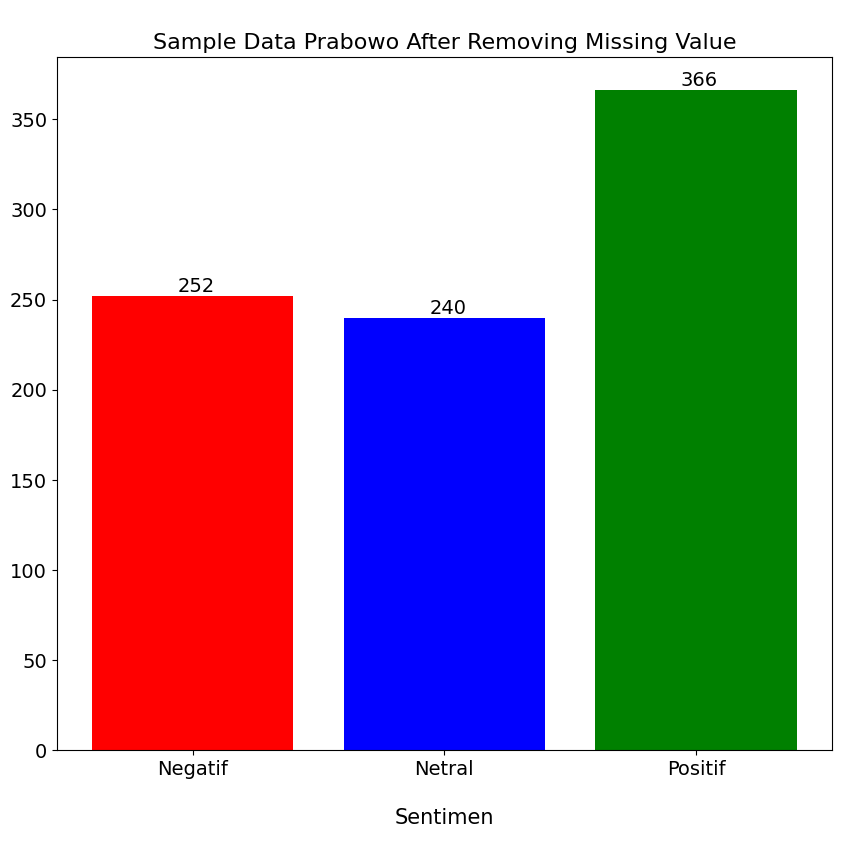

In [20]:
# SAMPEL DATA AFTER MISSING VALUE
x = ['Negatif','Netral','Positif']
y = data_cleanPrabowo['sentimen'].value_counts().sort_index()

fig, ax =  plt.subplots(figsize = (10, 9)) #---membuat figure dan axes--
ax.bar(x, y, color=('red','blue','green')) #---membuat bar chart---

#looping bar chart
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())), (bar.get_x(), bar.get_height())
                 ,ha='center',
                  va='center',
                  size=14,
                  xytext=(75, 7),
                  textcoords='offset points')
plt.title('\nSample Data Prabowo After Removing Missing Value', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## **MODEL**

In [21]:
#IMPORT DATA TEST PREP
import string

data_modelPrabowo = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/PrabowoTestPrep.xlsx')
data_modelPrabowo

,textDisplay,textDisplay_join,sentimen
0,"['karma', 'rezim', 'capres', 'boneka', 'istana...",karma rezim capres boneka istana gugur,Netral
1,"['jalur', 'catat', 'lihat', 'orang', 'ordebaru...",jalur catat lihat orang ordebaru cendana cari ...,Negatif
2,"['capres', 'janji', 'nya', 'gin', 'makmur', 'r...",capres janji nya gin makmur rakyat indonesia m...,Negatif
3,"['prabowo', 'bohong', 'caleg', 'gerindra', 'da...",prabowo bohong caleg gerindra daftar bohong em...,Negatif
4,"['moga', 'wujud', 'prabowo', 'pimpin', 'negara']",moga wujud prabowo pimpin negara,Positif
...,...,...,...
853,"['sumber', 'daya', 'indonesia', 'ambil', 'nega...",sumber daya indonesia ambil negara asing,Negatif
854,"['banget', 'manusia', 'bayar']",banget manusia bayar,Negatif
855,"['hukum', 'indonesia', 'benah', 'hukum', 'indo...",hukum indonesia benah hukum indonesia gak maju,Netral
856,"['era', 'prabowo', 'lanjut', 'program', 'ibuko...",era prabowo lanjut program ibukota nusantara p...,Positif


In [22]:
# CHANGE DATA TYPES

data_modelPrabowo = data_modelPrabowo.astype({'textDisplay_join': 'string'})
data_modelPrabowo = data_modelPrabowo.astype({'sentimen': 'category'})
data_modelPrabowo.dtypes

textDisplay                 object
textDisplay_join    string[python]
sentimen                  category
dtype: object

In [23]:
# DIVIDE VARIABLE

x = data_modelPrabowo['textDisplay_join']
y = data_modelPrabowo['sentimen']

print(x.shape)
print(y.shape)

(858,)
(858,)


In [24]:
# HOW TO KNOW SHAPE TRAIN AND TESTING

x_train, x_test, y_train, y_test = train_test_split(data_modelPrabowo['textDisplay_join'], data_modelPrabowo['sentimen'],
                                                    test_size = 0.5,
                                                    random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429,)
(429,)
(429,)
(429,)


In [25]:
#TF IDF PROCESS

tf = TfidfVectorizer(ngram_range=(1, 1)) #--mempertimbangkan hanya unigram--
text_tf = tf.fit_transform(data_modelPrabowo['textDisplay_join'].values.astype('U'))
print(text_tf)

h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(text_tf)
print(x_tfidf)

tfidf_vect =TfidfVectorizer()
vectors = tfidf_vect.fit_transform(data_modelPrabowo['textDisplay_join'].values.astype('U'))
feature_names = tfidf_vect.get_feature_names_out()

tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(vectors)

X = data_modelPrabowo['sentimen']
Y = data_modelPrabowo['textDisplay_join']

  (0, 445)	0.45614233132867027
  (0, 547)	0.45614233132867027
  (0, 205)	0.3851880046032046
  (0, 241)	0.2642968907905901
  (0, 1259)	0.3969633173712215
  (0, 638)	0.45614233132867027
  (1, 213)	0.30300565335642843
  (1, 670)	0.33597972559908934
  (1, 1363)	0.33597972559908934
  (1, 1113)	0.2594163008560094
  (1, 994)	0.17037180650307415
  (1, 1218)	0.1623123257195415
  (1, 1136)	0.2197935391085738
  (1, 1139)	0.16753087110788586
  (1, 242)	0.24012770509798242
  (1, 252)	0.28371705759840143
  (1, 1043)	0.33597972559908934
  (1, 1041)	0.17497910095430577
  (1, 823)	0.2197935391085738
  (1, 243)	0.2700315811137675
  (1, 565)	0.28371705759840143
  (2, 614)	0.31106747507746707
  (2, 142)	0.47992325178690415
  (2, 862)	0.2653969804556242
  (2, 522)	0.1931968868549451
  :	:
  (850, 522)	0.29842901535513033
  (850, 1041)	0.3860875730822761
  (851, 1168)	1.0
  (852, 1168)	1.0
  (853, 294)	0.46788082105754647
  (853, 1452)	0.49497767702019785
  (853, 92)	0.4120601402752122
  (853, 50)	0.4802949

In [26]:
#TF IDF DATA FRAME

X = tfidf_vect.fit_transform(data_modelPrabowo['textDisplay_join'])

df_tfidf = pd.DataFrame(X.T.todense(), index=feature_names,
                        columns=[f'D{i+1}' for i in range(X.shape[0])])
df_tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D849,D850,D851,D852,D853,D854,D855,D856,D857,D858
abadi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acak,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acara,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ada,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adab,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wirausaha,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wujud,0.0,0.0,0.0,0.0,0.625433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yang,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yaudah,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#TOP TEN MEAN TF_IDF

mean_tfidf = df_tfidf.mean(axis=1)
df_tfidf_mean = pd.DataFrame({'feature': feature_names, 'mean_tfidf': mean_tfidf})
df_tfidf_mean = df_tfidf_mean.sort_values(by='mean_tfidf', ascending=False)

top_10_features = df_tfidf_mean.head(10)
print(top_10_features)

             feature  mean_tfidf
prabowo      prabowo    0.129027
presiden    presiden    0.048835
indonesia  indonesia    0.033330
iya              iya    0.023077
moga            moga    0.021964
pilih          pilih    0.020368
rakyat        rakyat    0.020234
pimpin        pimpin    0.018674
nya              nya    0.018092
negara        negara    0.017115


In [28]:
#COUNT VECTOR
cv=CountVectorizer()

cv.fit(data_modelPrabowo['textDisplay_join'])
print(cv.vocabulary_)

{'karma': 638, 'rezim': 1259, 'capres': 241, 'boneka': 205, 'istana': 547, 'gugur': 445, 'jalur': 565, 'catat': 243, 'lihat': 823, 'orang': 1041, 'ordebaru': 1043, 'cendana': 252, 'cari': 242, 'pimpin': 1139, 'pikir': 1136, 'rakyat': 1218, 'negara': 994, 'penting': 1113, 'sendr': 1363, 'kelompok': 670, 'budak': 213, 'janji': 569, 'nya': 1018, 'gin': 433, 'makmur': 867, 'indonesia': 522, 'maju': 862, 'basi': 142, 'kali': 614, 'prabowo': 1168, 'bohong': 203, 'caleg': 233, 'gerindra': 426, 'daftar': 277, 'emosional': 360, 'moga': 951, 'wujud': 1684, 'beda': 154, 'bicara': 189, 'utara': 1654, 'selatan': 1341, 'program': 1188, 'gak': 389, 'realistis': 1237, 'pilih': 1138, 'kaya': 650, 'raya': 1233, 'dukung': 339, 'penacalonan': 1104, 'presiden': 1175, 'wapres': 1672, 'inget': 527, 'bagus': 111, 'true': 1588, 'semangat': 1348, 'deh': 296, 'putar': 1209, 'korupsi': 744, 'jawab': 575, 'keras': 686, 'usul': 1650, 'gue': 443, 'jabat': 553, 'kasih': 644, 'fasilitas': 375, 'bahagia': 113, 'nyaman'

In [29]:
#COUNT MATRIX
count_vector=cv.fit_transform(data_modelPrabowo['textDisplay_join'])
count_vectors=count_vector.toarray()
feature_names_cv = cv.get_feature_names_out()

#COUNTVECTOR SCORES
first_document_vector=count_vector[0]

#PRINT
countv = pd.DataFrame(first_document_vector.T.todense(),
index=feature_names_cv, columns=["Countvectorizer"])
countv.sort_values(by=["Countvectorizer"],ascending=False)

,Countvectorizer
capres,1
karma,1
rezim,1
boneka,1
gugur,1
...,...
jakarta,0
jajar,0
jajah,0
jahat,0


In [30]:
#menampilkan hasil tf-idf per kalimat
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(data_modelPrabowo["textDisplay_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(data_modelPrabowo["textDisplay_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()


tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

#data sampel
idx_sample = 4

print("Menampilkan TFIDF sample ke-" + str(idx_sample), "\n")
print(data_modelPrabowo["textDisplay_join"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t",
               "%.3f" % item[0], "\t",
               "%.3f" % item[1], "\t",
               "%.3f" % item[2])

Menampilkan TFIDF sample ke-4 

moga wujud prabowo pimpin negara 

	 	Term 	 TF 	 IDF 	 TF-IDF

                moga 	 0.200 	 3.565 	 0.713
              negara 	 0.200 	 3.596 	 0.719
              pimpin 	 0.200 	 3.535 	 0.707
             prabowo 	 0.200 	 1.707 	 0.341
               wujud 	 0.200 	 5.190 	 1.038


**NOT USING SMOTE**

In [31]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [32]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [34]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.67      0.24      0.35        25
      Netral       0.59      0.69      0.63        29
     Positif       0.67      0.91      0.77        32

    accuracy                           0.64        86
   macro avg       0.64      0.61      0.59        86
weighted avg       0.64      0.64      0.60        86



In [35]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [36]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [38]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.63      0.24      0.34        51
      Netral       0.55      0.61      0.58        51
     Positif       0.67      0.93      0.78        70

    accuracy                           0.63       172
   macro avg       0.62      0.59      0.57       172
weighted avg       0.62      0.63      0.59       172



In [39]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [40]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [42]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.54      0.32      0.41        77
      Netral       0.56      0.61      0.58        76
     Positif       0.72      0.90      0.80       105

    accuracy                           0.64       258
   macro avg       0.61      0.61      0.60       258
weighted avg       0.62      0.64      0.62       258



In [43]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [44]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [45]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [46]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.67      0.35      0.46       104
      Netral       0.57      0.61      0.59        97
     Positif       0.70      0.92      0.80       143

    accuracy                           0.66       344
   macro avg       0.65      0.62      0.61       344
weighted avg       0.65      0.66      0.63       344



In [47]:
#skenario 05

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [48]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [49]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [50]:
y_pred = model.predict(X_test)
print("Test Skenario 50:50")
print(classification_report(y_test, y_pred))

Test Skenario 50:50
              precision    recall  f1-score   support

     Negatif       0.51      0.21      0.30       128
      Netral       0.53      0.64      0.58       123
     Positif       0.67      0.85      0.75       178

    accuracy                           0.60       429
   macro avg       0.57      0.57      0.54       429
weighted avg       0.58      0.60      0.57       429



**USING SMOTE**

In [51]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [52]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)

In [54]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [55]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.77      0.59      0.67        34
      Netral       0.75      0.77      0.76        39
     Positif       0.73      0.86      0.79        37

    accuracy                           0.75       110
   macro avg       0.75      0.74      0.74       110
weighted avg       0.75      0.75      0.74       110



In [87]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [88]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [90]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [91]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.76      0.71      0.74        63
      Netral       0.76      0.69      0.73        75
     Positif       0.77      0.88      0.82        82

    accuracy                           0.77       220
   macro avg       0.77      0.76      0.76       220
weighted avg       0.77      0.77      0.77       220



In [61]:
#Confusion Matrix

def eval (y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)

    f, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax, cmap='inferno')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    #sns.set(font_scale=1.0)
    ax.tick_params(axis='both', which='major', labelsize=12)

    categories = [['True Negative', 'False Neutral', 'False Positive'],
                  ['False Negative', 'True Neutral', 'False Positive'],
                  ['False Negative', 'False Neutral', 'True Positive',]]

    positions = [(i, j) for i in range(len(cm)) for j in range(len(cm[i]))]

    for (i, j) in positions:
        if i < len(cm) and j < len(cm[i]):
            value = cm[i, j]
            category = categories[i][j]
            ax.text(j + 0.5, i + 0.7, f'{category}', ha="center", va="center", color='grey', fontsize=8, fontweight='bold')

    print('RFC Model Perfomance: Prabowo Subianto' + '\nSMOTE 80:20\n')
    plt.show()
    print('__________________________________________________________\n')
    print(classification_report(y_test, y_pred, zero_division = 0, digits = 2))
    print('__________________________________________________________')
    print('\nAccuracy\t: ', accuracy_score(y_test, y_pred))
    print('Precision\t: ', precision_score(y_test, y_pred, average='macro'))
    print('Recall\t\t: ', recall_score(y_test, y_pred, average='macro'))
    print('F1-Score\t: ', f1_score(y_test, y_pred, average='macro'))
    print('\n=========================================================\n')


RFC Model Perfomance: Prabowo Subianto
SMOTE 90:10



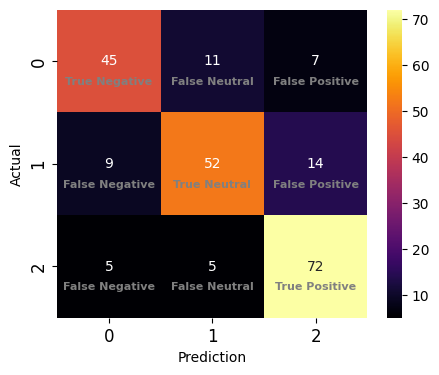

__________________________________________________________

              precision    recall  f1-score   support

     Negatif       0.76      0.71      0.74        63
      Netral       0.76      0.69      0.73        75
     Positif       0.77      0.88      0.82        82

    accuracy                           0.77       220
   macro avg       0.77      0.76      0.76       220
weighted avg       0.77      0.77      0.77       220

__________________________________________________________

Accuracy	:  0.7681818181818182
Precision	:  0.7672037650489392
Recall		:  0.7618892760356175
F1-Score	:  0.762611596054219




In [62]:
eval(y_test, y_pred)

In [63]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [64]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [66]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [67]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.82      0.55      0.66       105
      Netral       0.62      0.77      0.69        99
     Positif       0.77      0.83      0.80       126

    accuracy                           0.72       330
   macro avg       0.74      0.72      0.72       330
weighted avg       0.74      0.72      0.72       330



In [68]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [69]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

In [71]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [72]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.92      0.46      0.61       145
      Netral       0.63      0.80      0.70       142
     Positif       0.70      0.86      0.77       153

    accuracy                           0.71       440
   macro avg       0.75      0.70      0.69       440
weighted avg       0.75      0.71      0.70       440



In [73]:
#skenario 05

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelPrabowo['textDisplay_join'])
y = data_modelPrabowo['sentimen']

In [74]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

In [76]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [77]:
y_pred = model.predict(X_test)
print("Test Skenario 50:50")
print(classification_report(y_test, y_pred))

Test Skenario 50:50
              precision    recall  f1-score   support

     Negatif       0.83      0.42      0.56       186
      Netral       0.63      0.82      0.71       175
     Positif       0.73      0.87      0.80       188

    accuracy                           0.70       549
   macro avg       0.73      0.71      0.69       549
weighted avg       0.73      0.70      0.69       549



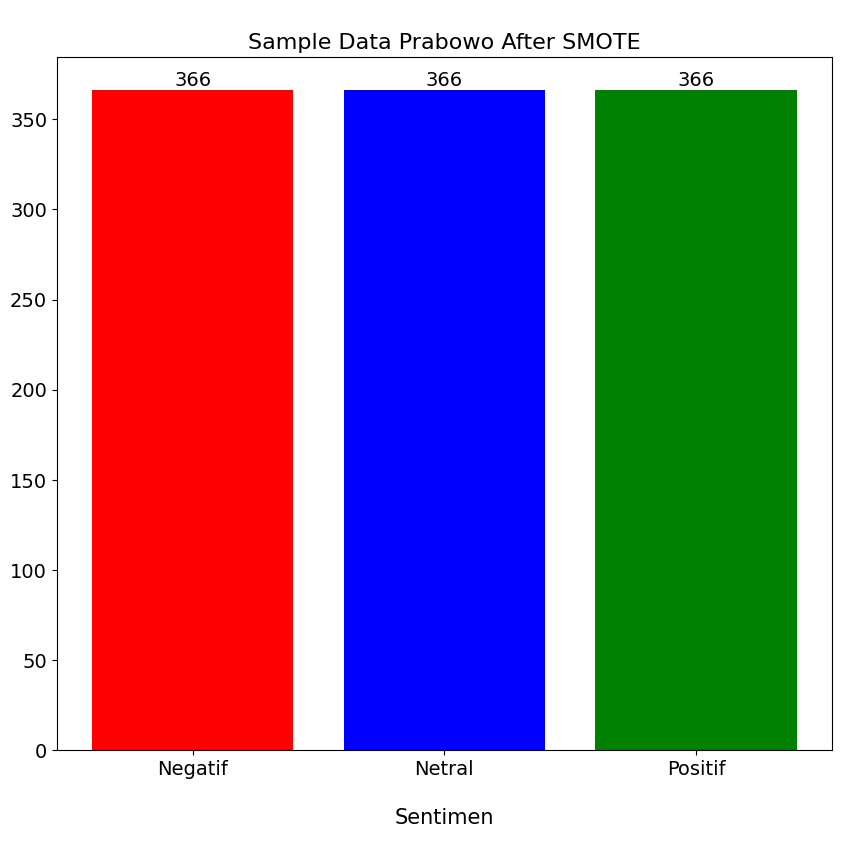

In [78]:
#VISUALIASI AFTER SMOTE

from sklearn.preprocessing import LabelEncoder

#change label to numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_smote)

#setup bar for SMOTE
x = ['Negatif', 'Netral', 'Positif']
y = np.bincount(y_encoded)
fig, ax = plt.subplots(figsize=(10, 9))
ax.bar(x, y, color=('red', 'blue', 'green'))
for bar in ax.patches:
    ax.annotate(str(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=14, xytext=(0, 7), textcoords='offset points')
plt.title('\nSample Data Prabowo After SMOTE', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()


## **Wordcloud**

In [84]:
#definisikan fungsi warna wordcloud

def green_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(120, 100%%, %d%%)' % np.random.randint(49, 51)
def blue_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(240, 100%%, %d%%)' % np.random.randint(49, 51)
def red_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(0, 100%%, %d%%)' % np.random.randint(49, 51)

In [85]:
#import gambar cloud
mask = np.array(Image.open('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/cloud.jpg'))

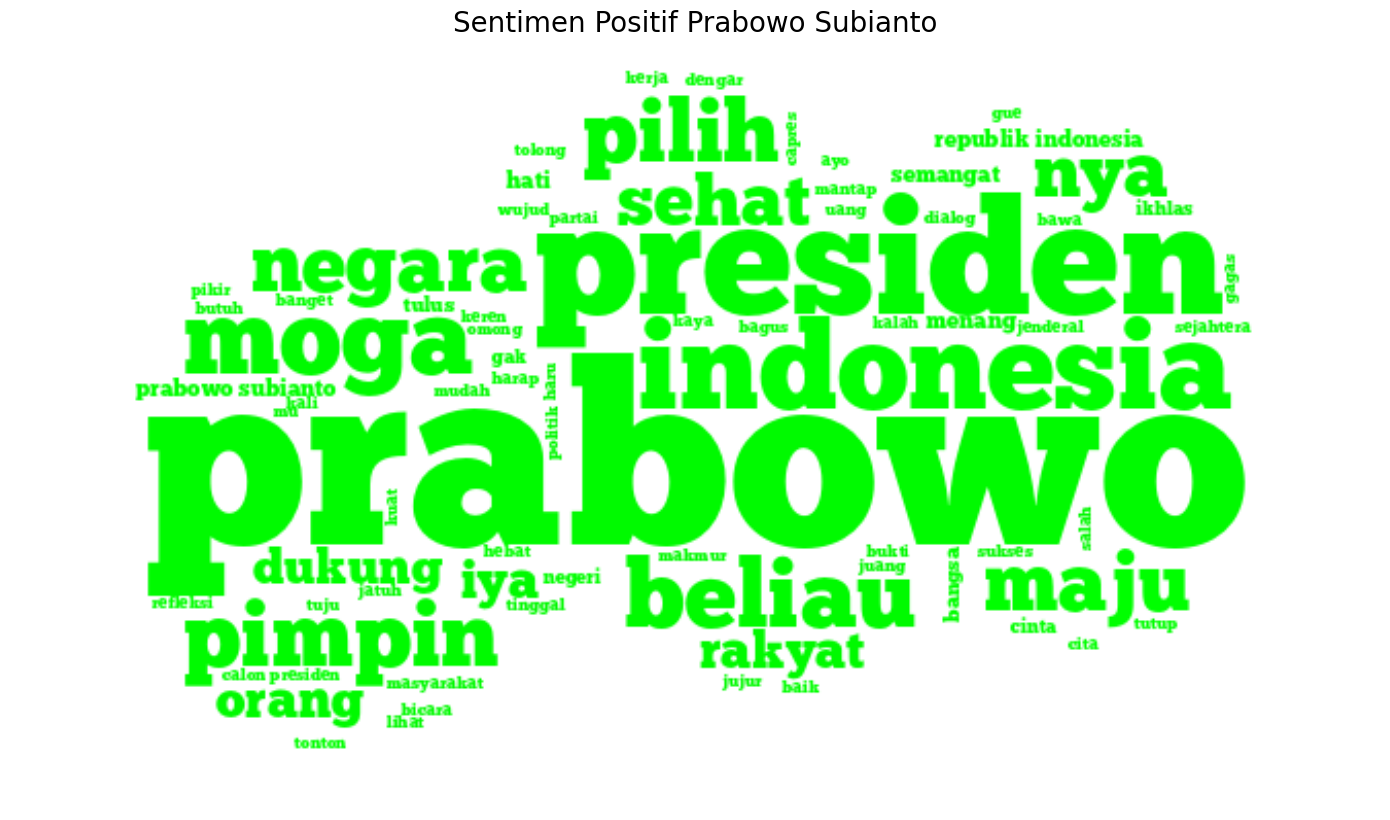

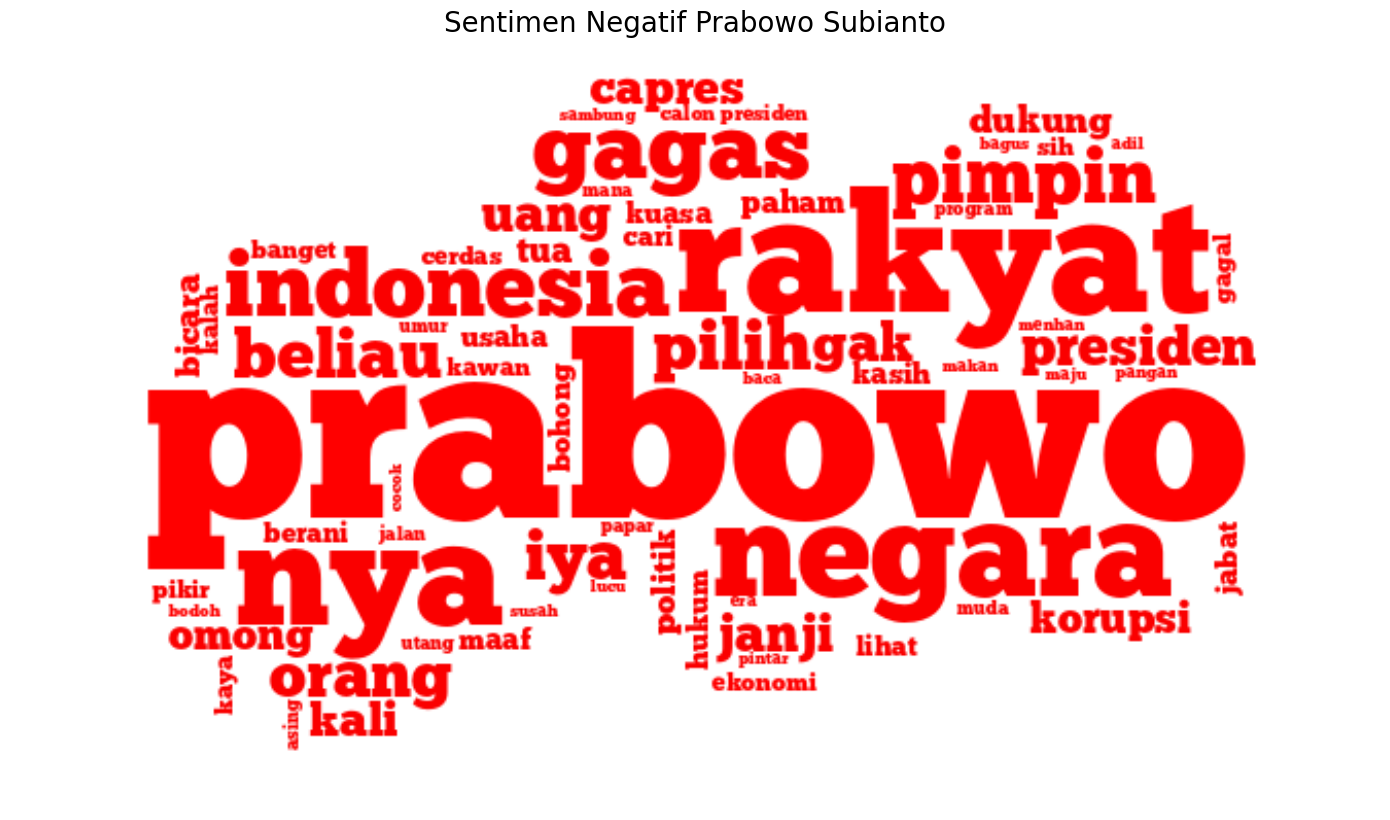

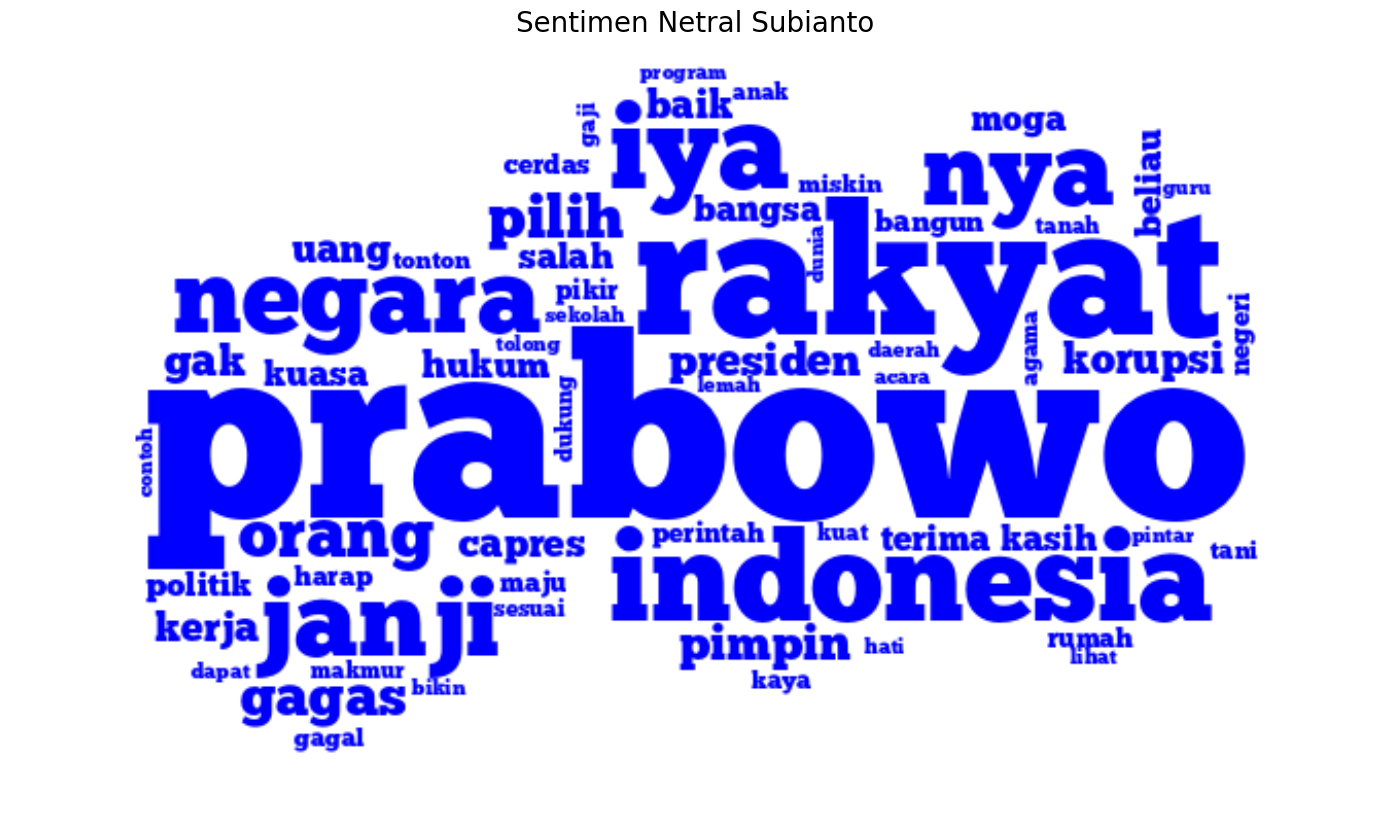

In [86]:
#setup wordcloud

texts_pos = data_modelPrabowo[data_modelPrabowo['sentimen'] == 'Positif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neg = data_modelPrabowo[data_modelPrabowo['sentimen'] == 'Negatif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neu = data_modelPrabowo[data_modelPrabowo['sentimen'] == 'Netral']['textDisplay_join'].astype(str).str.cat(sep=' ')

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_pos = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_pos)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neg = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neg)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neu = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/prabowoFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neu)

wordcloud_pos.generate(texts_pos)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_pos.recolor(color_func = green_color), interpolation='bilinear')
plt.title('Sentimen Positif Prabowo Subianto', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neg.generate(texts_neg)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neg.recolor(color_func = red_color), interpolation='bilinear')
plt.title('Sentimen Negatif Prabowo Subianto', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neu.generate(texts_neu)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neu.recolor(color_func = blue_color), interpolation='bilinear')
plt.title('Sentimen Netral Subianto', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()